<H3>Load Libraries</H3>

In [1]:
import numpy as np
import os
from scipy.misc import imread, imsave, imresize, imshow
import random
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import gc
from sklearn.cross_validation import train_test_split

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

<H3>Load phase '3' data</H3>

In [2]:
train = pd.read_csv('train_part\\3\\X_train_3.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.drop(train.columns[[0,1,2,6,7]], axis = 1, inplace = True)
train.drop('PH', axis=1, inplace=True)

In [4]:
train['Month1']=np.where(train['Month']==1.0, 1,0)
train['Month2']=np.where(train['Month']==2.0, 1,0)
train['Month3']=np.where(train['Month']==3.0, 1,0)
train['Month4']=np.where(train['Month']==4.0, 1,0)
train['Month5']=np.where(train['Month']==5.0, 1,0)
train['Month6']=np.where(train['Month']==6.0, 1,0)
train['Month7']=np.where(train['Month']==7.0, 1,0)
train['Month8']=np.where(train['Month']==8.0, 1,0)
train['Month9']=np.where(train['Month']==9.0, 1,0)
train['Month10']=np.where(train['Month']==10.0, 1,0)
train['Month11']=np.where(train['Month']==11.0, 1,0)
train['Month12']=np.where(train['Month']==12.0, 1,0)
train['Hour1']=np.where(train['Hour']==1.0, 1,0)
train['Hour2']=np.where(train['Hour']==2.0, 1,0)
train['Hour3']=np.where(train['Hour']==3.0, 1,0)
train['Hour4']=np.where(train['Hour']==4.0, 1,0)
train['Hour5']=np.where(train['Hour']==5.0, 1,0)
train['Hour6']=np.where(train['Hour']==6.0, 1,0)
train['Hour7']=np.where(train['Hour']==7.0, 1,0)
train['Hour8']=np.where(train['Hour']==8.0, 1,0)
train['Hour9']=np.where(train['Hour']==9.0, 1,0)
train['Hour10']=np.where(train['Hour']==10.0, 1,0)
train['Hour11']=np.where(train['Hour']==11.0, 1,0)
train['Hour12']=np.where(train['Hour']==12.0, 1,0)
train['Hour13']=np.where(train['Hour']==13.0, 1,0)
train['Hour14']=np.where(train['Hour']==14.0, 1,0)
train['Hour15']=np.where(train['Hour']==15.0, 1,0)
train['Hour16']=np.where(train['Hour']==16.0, 1,0)
train['Hour17']=np.where(train['Hour']==17.0, 1,0)
train['Hour18']=np.where(train['Hour']==18.0, 1,0)
train['Hour19']=np.where(train['Hour']==19.0, 1,0)
train['Hour20']=np.where(train['Hour']==20.0, 1,0)
train['Hour21']=np.where(train['Hour']==21.0, 1,0)
train['Hour22']=np.where(train['Hour']==22.0, 1,0)
train['Hour23']=np.where(train['Hour']==23.0, 1,0)
train['Hour24']=np.where(train['Hour']==24.0, 1,0)

In [5]:
train.drop('Month', axis = 1, inplace = True)
train.drop('Hour', axis = 1, inplace = True)

In [6]:
y = train.pop('FF')

In [7]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 2016)

In [8]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [9]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

<H3>Train the model</H3>

In [10]:
params = {}
params["objective"] = "reg:linear"
params["booster"] = "gbtree"
params["max_depth"] = 6
params["eval_metric"] = 'rmse'
params["subsample"] = 0.9
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["seed"] = 2016
params["eta"] = 0.1

plst = list(params.items())
num_rounds = 500
early_stopping_rounds = 10

watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]

model_3_1 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:6246.75	eval-rmse:6236.68
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:5625.87	eval-rmse:5616.76
[2]	train-rmse:5067.3	eval-rmse:5058.95
[3]	train-rmse:4564.92	eval-rmse:4557.19
[4]	train-rmse:4113.18	eval-rmse:4106.1
[5]	train-rmse:3706.34	eval-rmse:3700.11
[6]	train-rmse:3339.91	eval-rmse:3334.18
[7]	train-rmse:3010.45	eval-rmse:3004.79
[8]	train-rmse:2714.02	eval-rmse:2708.77
[9]	train-rmse:2447.41	eval-rmse:2442.66
[10]	train-rmse:2207.67	eval-rmse:2203.27
[11]	train-rmse:1992.29	eval-rmse:1988.24
[12]	train-rmse:1798.7	eval-rmse:1794.94
[13]	train-rmse:1624.57	eval-rmse:1621.15
[14]	train-rmse:1468.74	eval-rmse:1465.59
[15]	train-rmse:1328.31	eval-rmse:1325.67
[16]	train-rmse:1202.38	eval-rmse:1200.28
[17]	train-rmse:1089.57	eval-rmse:1088.05
[18]	train-rmse:988.369	eval-rmse:987.444
[19]	train-rmse:897.89	eval-rmse:897.474
[20]	train-rmse:817.069	eval-rm

In [11]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 1982)

In [12]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [13]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

In [14]:
watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]
model_3_2 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:6240.17	eval-rmse:6263.54
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:5620.17	eval-rmse:5640.75
[2]	train-rmse:5062.35	eval-rmse:5080.56
[3]	train-rmse:4560.46	eval-rmse:4576.35
[4]	train-rmse:4109.2	eval-rmse:4122.93
[5]	train-rmse:3702.81	eval-rmse:3714.89
[6]	train-rmse:3337.5	eval-rmse:3347.86
[7]	train-rmse:3008.18	eval-rmse:3017.08
[8]	train-rmse:2712.16	eval-rmse:2719.99
[9]	train-rmse:2445.78	eval-rmse:2452.57
[10]	train-rmse:2206.32	eval-rmse:2212.22
[11]	train-rmse:1991.22	eval-rmse:1996.25
[12]	train-rmse:1797.87	eval-rmse:1802.22
[13]	train-rmse:1624.1	eval-rmse:1628.05
[14]	train-rmse:1468.39	eval-rmse:1472.06
[15]	train-rmse:1328.5	eval-rmse:1331.95
[16]	train-rmse:1202.46	eval-rmse:1205.77
[17]	train-rmse:1089.4	eval-rmse:1092.69
[18]	train-rmse:988.363	eval-rmse:991.549
[19]	train-rmse:898.041	eval-rmse:900.881
[20]	train-rmse:817.195	eval-rms

In [15]:
test = pd.read_csv('test\\CAX_Test.csv')

In [16]:
test = test[test.PH==3]

In [17]:
test.drop(test.columns[[0,1,2,6,7]], axis = 1, inplace = True)

In [18]:
test.drop('PH', axis=1, inplace=True)

In [19]:
test['Month1']=np.where(test['Month']==1.0, 1,0)
test['Month2']=np.where(test['Month']==2.0, 1,0)
test['Month3']=np.where(test['Month']==3.0, 1,0)
test['Month4']=np.where(test['Month']==4.0, 1,0)
test['Month5']=np.where(test['Month']==5.0, 1,0)
test['Month6']=np.where(test['Month']==6.0, 1,0)
test['Month7']=np.where(test['Month']==7.0, 1,0)
test['Month8']=np.where(test['Month']==8.0, 1,0)
test['Month9']=np.where(test['Month']==9.0, 1,0)
test['Month10']=np.where(test['Month']==10.0, 1,0)
test['Month11']=np.where(test['Month']==11.0, 1,0)
test['Month12']=np.where(test['Month']==12.0, 1,0)
test['Hour1']=np.where(test['Hour']==1.0, 1,0)
test['Hour2']=np.where(test['Hour']==2.0, 1,0)
test['Hour3']=np.where(test['Hour']==3.0, 1,0)
test['Hour4']=np.where(test['Hour']==4.0, 1,0)
test['Hour5']=np.where(test['Hour']==5.0, 1,0)
test['Hour6']=np.where(test['Hour']==6.0, 1,0)
test['Hour7']=np.where(test['Hour']==7.0, 1,0)
test['Hour8']=np.where(test['Hour']==8.0, 1,0)
test['Hour9']=np.where(test['Hour']==9.0, 1,0)
test['Hour10']=np.where(test['Hour']==10.0, 1,0)
test['Hour11']=np.where(test['Hour']==11.0, 1,0)
test['Hour12']=np.where(test['Hour']==12.0, 1,0)
test['Hour13']=np.where(test['Hour']==13.0, 1,0)
test['Hour14']=np.where(test['Hour']==14.0, 1,0)
test['Hour15']=np.where(test['Hour']==15.0, 1,0)
test['Hour16']=np.where(test['Hour']==16.0, 1,0)
test['Hour17']=np.where(test['Hour']==17.0, 1,0)
test['Hour18']=np.where(test['Hour']==18.0, 1,0)
test['Hour19']=np.where(test['Hour']==19.0, 1,0)
test['Hour20']=np.where(test['Hour']==20.0, 1,0)
test['Hour21']=np.where(test['Hour']==21.0, 1,0)
test['Hour22']=np.where(test['Hour']==22.0, 1,0)
test['Hour23']=np.where(test['Hour']==23.0, 1,0)
test['Hour24']=np.where(test['Hour']==24.0, 1,0)

In [20]:
test.drop('Month', axis = 1, inplace = True)
test.drop('Hour', axis = 1, inplace = True)
test.drop('FF', axis = 1, inplace = True)
test_id = test.pop('id')

In [21]:
xgtest = xgb.DMatrix(test)

<H3>Predict on test data</H3>

In [22]:
pred1 = model_3_1.predict(xgtest)
pred2 = model_3_2.predict(xgtest)

In [23]:
submission_3 = pd.DataFrame(columns = ['id', 'pred1', 'pred2', 'FF'])

In [24]:
submission_3['id'] = test_id
submission_3['pred1'] = pred1
submission_3['pred2'] = pred2
submission_3['FF'] = (submission_3['pred1']+submission_3['pred2'])/2.0

In [25]:
submission_3.drop('pred1', axis = 1, inplace = True)
submission_3.drop('pred2', axis = 1, inplace = True)

In [26]:
submission_3.to_csv('0819\\submission_3.csv', index = False)

In [27]:
feat_imp_1 = pd.Series(model_3_1.get_fscore()).sort_values(ascending=False)
feat_imp_2 = pd.Series(model_3_2.get_fscore()).sort_values(ascending=False)

In [28]:
%matplotlib inline

In [29]:
feat_imp_1.to_csv('feat_imp_3_1.csv')
feat_imp_2.to_csv('feat_imp_3_2.csv')

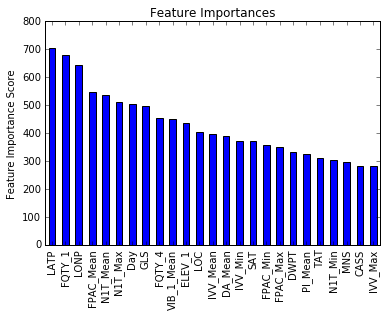

In [30]:
feat_imp_1[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

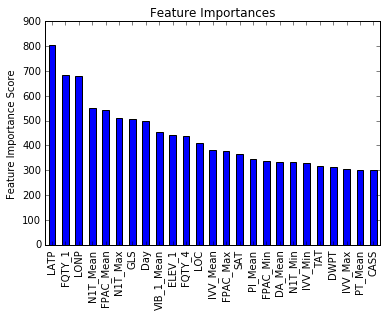

In [31]:
feat_imp_2[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')